In [395]:
import csv
import numpy as np
import matplotlib.pyplot as plt
x = []
y = []
origin = []
with open('eyebrow.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        origin.append(row)
        data = [int(d) for d in row[1:]]
        n = int(len(data)/2)
        x.append(data[:n])
        y.append(data[n:])
num = len(x)
print("data num:",num)        

data num: 14187


In [375]:
from math import atan2, degrees
def cal_angle(x, y):
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    d1 = degrees(atan2(dy,dx))
    dx = x[1]-x[2]
    dy = y[1]-y[2]
    d2 = degrees(atan2(dy,dx))
    return abs(d1-d2)

In [376]:
angles1 = []
angles2 = []
labels = []
dists=[]
for i in range(num):
    rx = x[i]
    ry = y[i]
    dists.append(rx[5]-rx[4])
    angle1 = cal_angle(rx[0:3],ry[0:3])
    angles1.append(angle1)
    angle2 = cal_angle(rx[1:4],ry[1:4])
    angles2.append(angle2)
    if angle1<175:
        labels.append("Arch")
    elif angle2<180:
        labels.append("Straight")
    else:
        labels.append("Circle")    

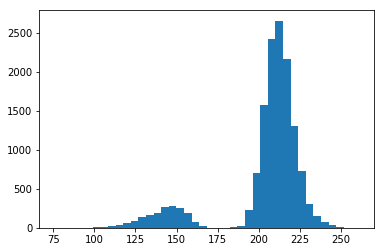

In [377]:
plt.hist(angles1, bins=40)
plt.show()

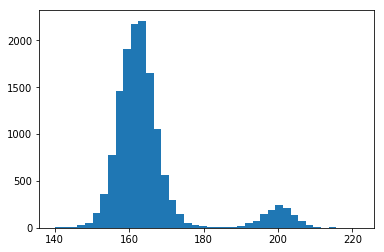

In [378]:
plt.hist(angles2, bins=40)
plt.show()

Text(0,0.5,'angle2')

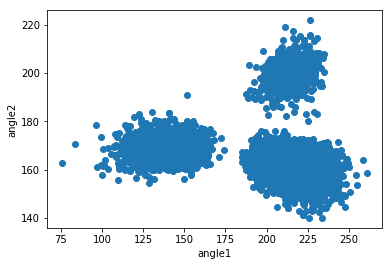

In [379]:
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(angles1,angles2)
plt.xlabel('angle1')
plt.ylabel('angle2')

In [396]:
labels = np.asarray(labels).reshape((num,1))
origin = np.asarray(origin).reshape((num,2*n+1))
output = np.hstack((origin,labels))

In [403]:
print(output[:,0])

['18_0_0_20170103201308008.jpg.chip.jpg'
 '18_0_0_20170103201519511.jpg.chip.jpg'
 '18_0_0_20170105183259439.jpg.chip.jpg' ...
 '50_1_4_20170105173053477.jpg.chip.jpg'
 '50_1_4_20170117203355296.jpg.chip.jpg'
 '50_1_4_20170117204033496.jpg.chip.jpg']


In [405]:
with open('output.csv','w',encoding='utf8',newline='') as file:
    wr = csv.writer(file) #, quoting=csv.QUOTE_ALL)
    wr.writerows(output)